In [86]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Simulation for first conclusion

In [82]:
def collide(particles):
    # Choose two particles randomly
    idx1 = random.randint(0, len(particles) - 1)
    idx2 = random.randint(0, len(particles) - 1)
    
    # Ensure the two particles chosen are different
    while idx2 == idx1:
        idx2 = random.randint(0, len(particles) - 1)
    
    # Determine the remaining species after collision
    remaining_species = (set(['A', 'B', 'C']) - set([particles[idx1], particles[idx2]])).pop()
    
    # Replace the collided particles with the remaining species
    particles[idx1] = remaining_species
    particles[idx2] = remaining_species

def simulate(initial_species, num_particles, num_collisions):
    # Initialize particles with initial species
    particles = [initial_species] * num_particles
    
    # Perform collisions
    for _ in range(num_collisions):
        collide(particles)
    
    # Count the final number of particles of the initially dominant species
    final_count = particles.count(initial_species)
    
    return final_count

# Initial conditions
initial_proportions = {'A': 0.1, 'B': 0.8, 'C': 0.1}  # Initial proportions of species A, B, and C
initial_species = max(initial_proportions, key=initial_proportions.get)  # Select species with highest proportion
num_particles = 1000
num_collisions = 200000

print(f"Initially dominant species: {initial_species}")

# Simulate and print final state
final_count = simulate(initial_species, num_particles, num_collisions)
print("\nFinal outcome of collisions:")
print(f"Particles of species {initial_species}: {final_count}")
print(f"Total number of particles: {num_particles}")


Initially dominant species: B

Final outcome of collisions:
Particles of species B: 361
Total number of particles: 1000


# Circular case simulation and their initial states

In [84]:
import random

def collision(a, b):
  """Simulates a collision between two particles.
  Args:
      a: Type of particle A (string).
      b: Type of particle B (string).
  Returns:
      Tuple containing the resulting types after collision (strings).
  """
  if a == b:
    return (a, b)  # No change if same type
  else:
    # Determine the third type (C) based on A and B
    third_type = chr(ord('A') + (ord(a) - ord('A') + ord(b) - ord('A')) % 3)
    return (third_type, third_type)  # Both convert to the third type

def simulate_collisions(particles):
  """Simulates collisions in a system of particles.
  Args:
      particles: List of characters representing particle types (A, B, C).
  Returns:
      Tuple containing:
          - Final state of particles (list of characters)
          - Boolean indicating if a circular case was encountered
  """
  seen_states = set()  # Track encountered states to detect cycles
  while True:
    changed = False
    for i in range(len(particles) - 1):
      for j in range(i + 1, len(particles)):
        if particles[i] != particles[j]:
          new_a, new_b = collision(particles[i], particles[j])
          particles[i] = new_a
          particles[j] = new_b
          changed = True
          break  # Only need to check for one collision each iteration
      if not changed:
        break  # No collisions occurred, system reached a stable state
    current_state = tuple(particles)  # Convert list to hashable tuple for set
    if current_state in seen_states:
      return particles, True
    seen_states.add(current_state)
    if len(set(particles)) == 1:
      return particles, False
    
    if current_state in seen_states:
      return particles, True  # Circular case detected
    seen_states.add(current_state)
  return particles, False  # No circular case

def main():
  # Run simulations with different initial conditions
  scenarios = [  # Non-circular case
      ['A', 'A', 'B', 'B', 'C', 'C'],  # Circular case
      [random.choice(['A', 'B', 'C']) for _ in range(10)],  # Random case 1
      [random.choice(['A', 'B', 'C']) for _ in range(20)],  # Random case 2
  ]

  for particles in scenarios:
    final_state, is_circular = simulate_collisions(particles.copy())
    if is_circular:
      print(f"Initial: {particles} - Circular Case")
    else:
      print(f"Initial: {particles} - Final: {final_state}")

if __name__ == "__main__":
  main()


Initial: ['A', 'A', 'B', 'B', 'C', 'C'] - Circular Case
Initial: ['A', 'B', 'B', 'C', 'C', 'A', 'B', 'A', 'B', 'B'] - Circular Case
Initial: ['B', 'B', 'A', 'A', 'A', 'C', 'C', 'C', 'A', 'A', 'A', 'B', 'A', 'B', 'C', 'C', 'B', 'A', 'C', 'C'] - Circular Case


# Plot NA

C:\Users\Louis Lee\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


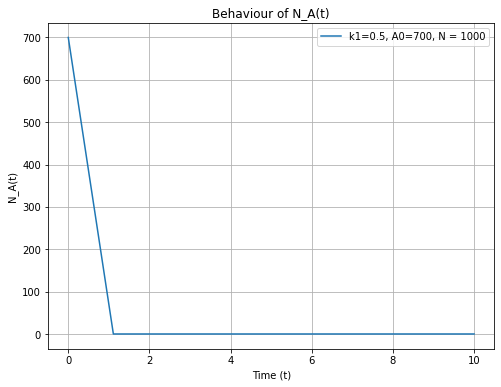

In [25]:
def calculate_NA(N, A0, k1, t):
  """
  This function calculates N_A based on the given expression.
  """
  return N / (1 - np.exp(N * k1 * t) * (1 - N / A0))

# Define initial values (modify these as needed)
N = 1000  # Total number of particles
A0 = 700   # Initial number of A particles
k1 = 0.5   # Rate constant

# Define time range for plotting
t_min = 0
t_max = 10
t_values = np.linspace(t_min, t_max, 10)  # Array of time points

# Calculate N_A for different values (modify these lists for additional plots)
NA_values1 = calculate_NA(N, A0, k1, t_values)

# Modify these lines to add calculations for N_A with different parameters (e.g., k1)
#NA_values2 = calculate_NA(N, A0, 0.2, t_values)  # Example with lower k1
#NA_values3 = calculate_NA(N, 500, 0.5, t_values)  # Example with lower A0

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(t_values, NA_values1, label='k1=0.5, A0=700, N = 1000')
#plt.plot(t_values, NA_values2, label='k1=0.2, A0=700 (Lower k1)')  # Modify labels accordingly
#plt.plot(t_values, NA_values3, label='k1=0.5, A0=500 (Lower A0)')  # Modify labels accordingly

plt.xlabel('Time (t)')
plt.ylabel('N_A(t)')
plt.title('Behaviour of N_A(t)')
plt.legend()
plt.grid(True)
plt.show()


## Different $A_{0}$ with same $N$

C:\Users\Louis Lee\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


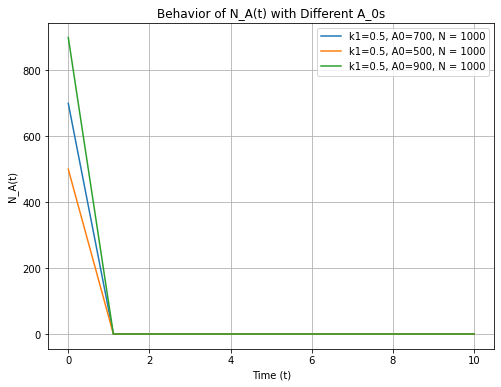

In [44]:
def calculate_NA(N, A0, k1, t):
  """
  This function calculates N_A based on the given expression.
  """
  return N / (1 - np.exp(N * k1 * t) * (1 - N / A0))

# Define initial values (modify these as needed)
N = 1000  # Total number of particles
A0 = 700   # Initial number of A particles
k1 = 0.5   # Rate constant

# Define time range for plotting
t_min = 0
t_max = 10
t_values = np.linspace(t_min, t_max, 10)  # Array of time points

# Calculate N_A for different values (modify these lists for additional plots)
NA_values1 = calculate_NA(N, A0, k1, t_values)

# Modify these lines to add calculations for N_A with different parameters (e.g., k1)
NA_values2 = calculate_NA(N, 500, 0.5, t_values)  # Example with lower k1
NA_values3 = calculate_NA(N, 900, 0.5, t_values)  # Example with lower A0

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(t_values, NA_values1, label='k1=0.5, A0=700, N = 1000')
plt.plot(t_values, NA_values2, label='k1=0.5, A0=500, N = 1000')  # Modify labels accordingly
plt.plot(t_values, NA_values3, label='k1=0.5, A0=900, N = 1000')  # Modify labels accordingly

plt.xlabel('Time (t)')
plt.ylabel('N_A(t)')
plt.title('Behavior of N_A(t) with Different A_0s')
plt.legend()
plt.grid(True)
plt.show()


## Differnet $N$ but same ratio

C:\Users\Louis Lee\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


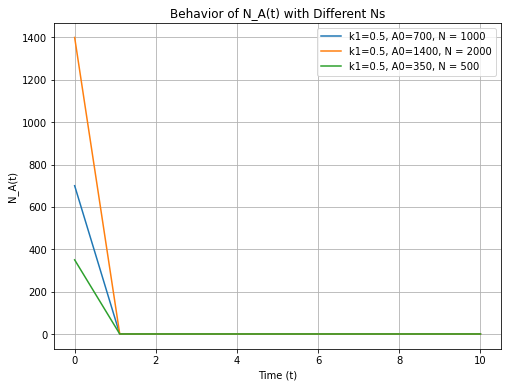

In [48]:
def calculate_NA(N, A0, k1, t):
  """
  This function calculates N_A based on the given expression.
  """
  return N / (1 - np.exp(N * k1 * t) * (1 - N / A0))

# Define initial values (modify these as needed)
N = 1000  # Total number of particles
A0 = 700   # Initial number of A particles
k1 = 0.5   # Rate constant

# Define time range for plotting
t_min = 0
t_max = 10
t_values = np.linspace(t_min, t_max, 10)  # Array of time points

# Calculate N_A for different values (modify these lists for additional plots)
NA_values1 = calculate_NA(N, A0, k1, t_values)

# Modify these lines to add calculations for N_A with different parameters (e.g., k1)
NA_values2 = calculate_NA(2000, 1400, 0.5, t_values)  # Example with lower k1
NA_values3 = calculate_NA(500, 350, 0.5, t_values)  # Example with lower A0

# Plotting
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.plot(t_values, NA_values1, label='k1=0.5, A0=700, N = 1000')
plt.plot(t_values, NA_values2, label='k1=0.5, A0=1400, N = 2000')  # Modify labels accordingly
plt.plot(t_values, NA_values3, label='k1=0.5, A0=350, N = 500')  # Modify labels accordingly

plt.xlabel('Time (t)')
plt.ylabel('N_A(t)')
plt.title('Behavior of N_A(t) with Different Ns')
plt.legend()
plt.grid(True)
plt.show()


# Extension

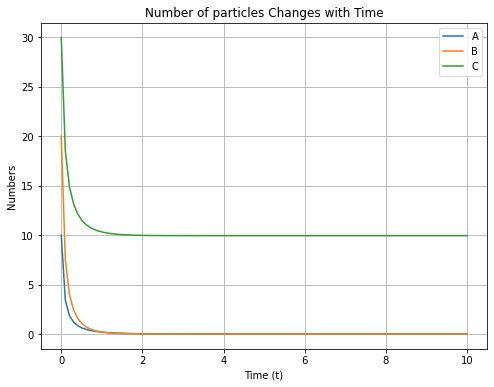

In [87]:
def reaction_rates(y, t, gamma, P_AB, P_BC, P_AC):
  A, B, C = y  
  k1 = gamma * P_AB
  k2 = gamma * P_BC
  k3 = gamma * P_AC
  dA_dt = -k1 * A * B - k3 * A * C
  dB_dt = -k1 * A * B - k2 * B * C
  dC_dt = -k2 * B * C - k3 * A * C
  return [dA_dt, dB_dt, dC_dt]

# Set parameters
gamma = 1.0  # Constant factor relating collision probability to rate constant
P_AB = 0.5   # Collision probability for A + B
P_BC = 0.3   # Collision probability for B + C
P_AC = 0.2   # Collision probability for A + C

# Set initial conditions of A,B, and C
y0 = [10, 20, 30]  

# Define time range 
t_min = 0
t_max = 10
t_values = np.linspace(t_min, t_max, 100)

# Solve the system of differential equations
solution = odeint(reaction_rates, y0, t_values, args=(gamma, P_AB, P_BC, P_AC))
A_t, B_t, C_t = solution.T 

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(t_values, A_t, label='A')
plt.plot(t_values, B_t, label='B')
plt.plot(t_values, C_t, label='C')
plt.xlabel('Time (t)')
plt.ylabel('Numbers')
plt.title('Number of particles Changes with Time')
plt.legend()
plt.grid(True)
plt.show()
